# Self-Supervised Learning (Contrastive Learning) overall performance and analysis

In [10]:
################################
#       Author: Jiaxuan Li     #
#          zID: z5086369       #
#     Lecturer: Shuiqiao Yang  #
#       Course: COMP4121       #
#     COMP4121 Major Project   #
# ##############################
"""
Thanks to CIFAR team providing CIFAR10 dataset, you can access the dataset through following links:
https://www.cs.toronto.edu/~kriz/cifar.html

"""
import matplotlib.pyplot as plt
import pandas as pd
from evaluation import evaluation

In [11]:
eval = evaluation(top_N_acc = 5, encoder_type = "ResNet18")
eval.evaluation()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data
############################ Author: Jiaxuan Li, z5086369, UNSW ##############################
##############################################################################################
################################# ... Model Evaluation ...  ##################################
##############################################################################################


50it [00:05,  9.18it/s]

----------------- ResNet18 SimCLR Evaluation -----------------
                   top1 accuracy is  86.55%
                   top2 accuracy is  95.07%
                   top3 accuracy is  97.73%
                   top4 accuracy is  98.94%
                   top5 accuracy is  99.51%


## The following image is the experimental results for unsupervised learning

### Cosine Annealing Learning Rate VS Loss

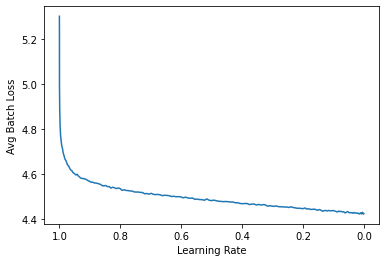

In [12]:
def plotting(path, x, y):
    df = pd.read_csv(path, sep = " ", names = ["epoch", "Avg Batch Loss", "Learning Rate", "Avg Image Loss"])
    x_axis = df[x].to_numpy()
    y_axis = df[y].to_numpy()
    if len(x_axis) != len(y_axis):
        raise("Please check the dim")
    plt.plot(x_axis,y_axis)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gca().invert_xaxis()

path = './overall_performance/200_epoch_86.55_acc/unsupervised_loss.txt'
plotting(path, "Learning Rate", "Avg Batch Loss")
plt.savefig('batch_loss_vs_learning_rate.png')

#### From above image, we can see that when learning rate decrease, the unsupervised NT_Xent Loss is also decrease. Note, the Learning Rate is decrasing from 1.0 to 0.001

### Average Image Loss VS Learning Rate

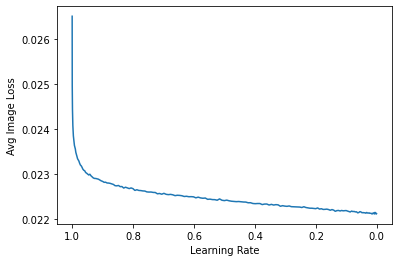

In [13]:
plotting(path, "Learning Rate", "Avg Image Loss")
plt.savefig('average_image_loss_vs_learning_rate.png')

### Epoch VS learning Rate

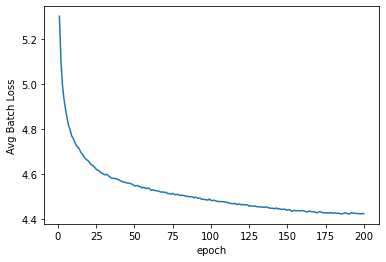

In [14]:
plt.gca().invert_xaxis()
plotting(path, "epoch", "Avg Batch Loss")
plt.savefig('unsupervised_learning_avg_batch_loss_vs_epoch.png')

##### From the above plot, the loss is keep decreasing, and the trend of loss still tends to decrease. If the epoch increase to 500 or 1000, the loss will be much lower than current result and the accuracy will be higher. Ideally, the accuracy will be higher than fine-tuning resnet18. Due to the equipment liminations, I could not test the model in more epochs. I have tried 100 epochs. The accuracy is around 72.65% in top1 acc. A 100 increase epoch improves around 13.9% in accuracy. Hence, more epochs and larger unlabelled dataset will improve the overall performance of the SimCLR Performance. The paper from https://arxiv.org/pdf/2002.05709.pdf shows that SimCLR with ResNet50 has 95.3 accuarcy on CIFAR10. However, the CIFAR10 dataset's image is 32-32-3, which has a relatively lower resolution. Hence, a resnet18 based SimCLR and resnet34 based SimCLR will not have much difference with resnet50. In the paper, they trained the model with 1000 epochs. If I can train the resnet18 based SimCLR with 1000 epochs, I 100% believe my model can achieve higher than 93% in overall performance.

### Downstream traing analysis

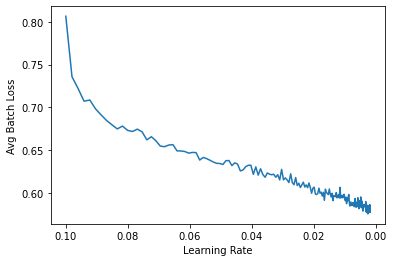

In [15]:
path = './overall_performance/200_epoch_86.55_acc/Supervised_loss.txt'
plotting(path, "Learning Rate", "Avg Batch Loss")
plt.savefig('Down_stream_batch_loss_vs_learning_rate.png')

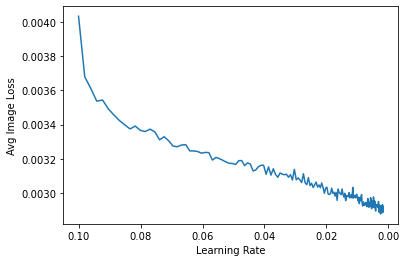

In [16]:
plotting(path, "Learning Rate", "Avg Image Loss")
plt.savefig('Down_stream_imageloss_vs_learning_rate.png')

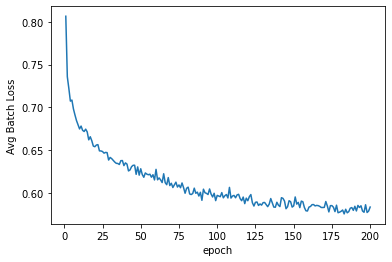

In [17]:
plt.gca().invert_xaxis()
plotting(path, "epoch", "Avg Batch Loss")
plt.savefig('Downstream_batch_loss_vs_epoch.png')

##### From above image, we can see that at epoch 125, the average batch loss is almost same to 200 epochs. Thus, for downstream traning, it may needs less epoch to achieve very similar consequence with large epoch. In futher stage, I will attempt to use less epoch in downstream task. 

## Outlooks

1. Apply the Self-supervised learning in NLP. Masked Language Modelling, Sentence Prediction, Emoji Prediction, Voice Authentication.
2. NT_Xent loss will not be a good idea if the dataset has lots of classes. An efficient grouping of dataset is highly important for contrastive learning process.
3. ResNet based encoder is a good feature extractor. However, in specific task, some state of the arts encoders will be better than resnet.
4. The MLP projection head could be imporved in futher stage.